   Feature1  Feature2     Target
0  0.496714  0.569669   3.090322
1 -0.138264 -0.729943  -3.640063
2  0.647689 -0.500266  -0.655380
3  1.523030  2.715970  15.543386
4 -0.234153  0.264522   1.552808


/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

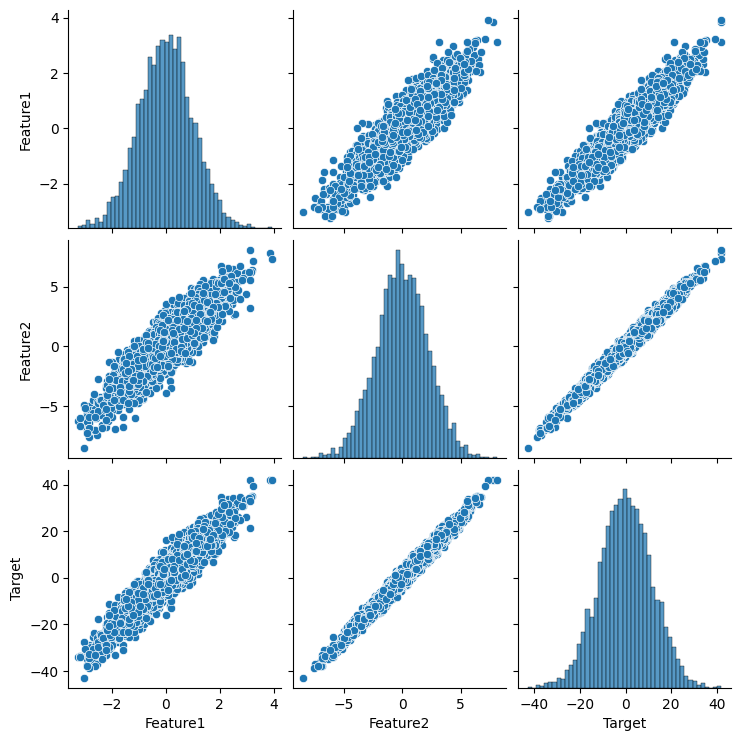

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data with two features and a target variable
num_samples = 1000
feature1 = np.random.normal(0, 1, num_samples)
feature2 = 2 * feature1 + np.random.normal(0, 1, num_samples)
target = 3 * feature1 + 4 * feature2 + np.random.normal(0, 1, num_samples)

# Create a DataFrame to store the data
data = pd.DataFrame({'Feature1': feature1, 'Feature2': feature2, 'Target': target})

# Display the first few rows of the generated data
print(data.head())

# Visualize the data using a pair plot
sns.pairplot(data)
plt.show()


          Feature1     Feature2       Target
count  5000.000000  5000.000000  5000.000000
mean      0.005602     0.001330     0.032679
std       0.996480     2.232846    11.713885
min      -3.241267    -8.502721   -42.933020
25%      -0.657905    -1.453257    -7.714517
50%       0.013466    -0.010094    -0.034912
75%       0.666011     1.502148     7.940049
max       3.926238     8.081586    42.136218


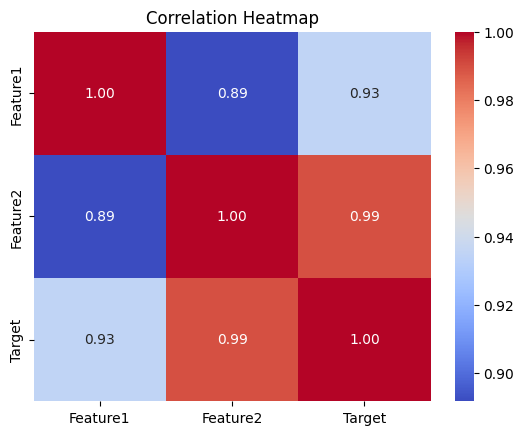

In [26]:
# EDA: Summary statistics
print(data.describe())

# EDA: Correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Mean Squared Error: 1.029896624806696
Model Coefficients:
Feature1: 3.0172935435146755
Feature2: 3.9883267723338522


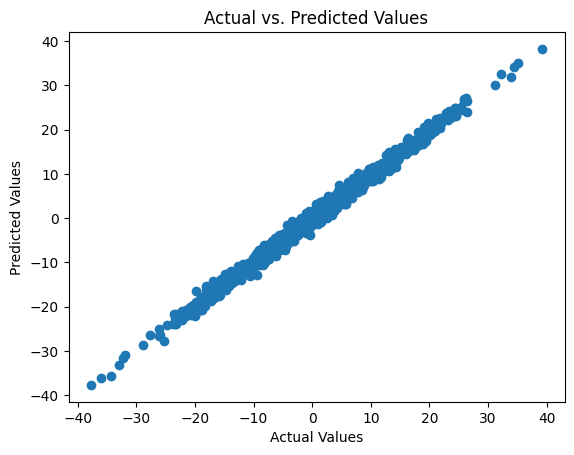

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into features (X) and target variable (y)
X = data[['Feature1', 'Feature2']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the model coefficients
print('Model Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


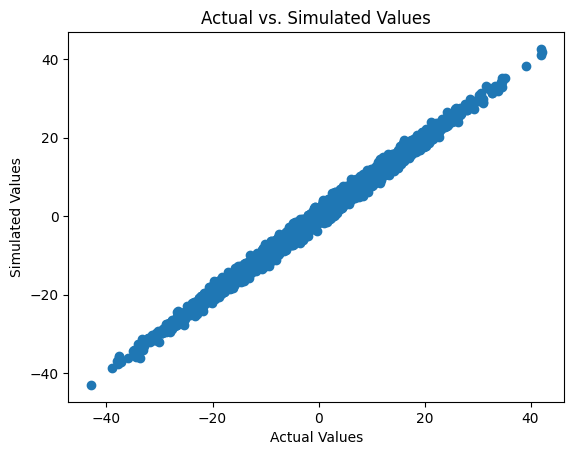

In [28]:
# Simulate outcomes using the trained model
simulated_outcomes = model.predict(X)

# Add the simulated outcomes to the DataFrame
data['Simulated_Outcome'] = simulated_outcomes

# Visualize the actual vs. simulated outcomes
plt.scatter(data['Target'], data['Simulated_Outcome'])
plt.xlabel('Actual Values')
plt.ylabel('Simulated Values')
plt.title('Actual vs. Simulated Values')
plt.show()


Mean Squared Error for Simulation: 0.9975037932976812


/tmp/ipykernel_29496/1434701633.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Target'], label='Actual Outcomes', shade=True)
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_29496/1434701633.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kde

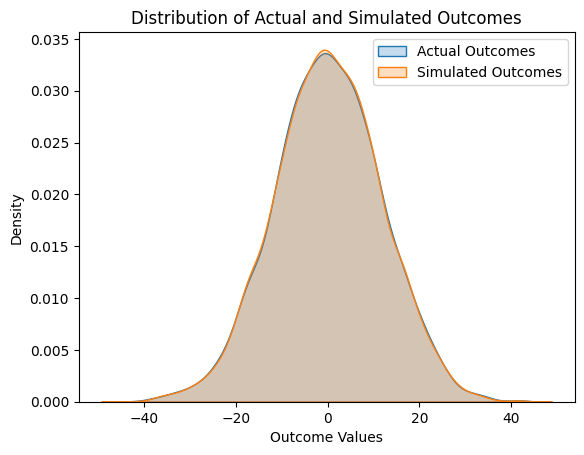

In [29]:
# Evaluate the model performance
mse_simulation = mean_squared_error(data['Target'], data['Simulated_Outcome'])
print(f'Mean Squared Error for Simulation: {mse_simulation}')

# Visualize the distribution of actual and simulated outcomes
sns.kdeplot(data['Target'], label='Actual Outcomes', shade=True)
sns.kdeplot(data['Simulated_Outcome'], label='Simulated Outcomes', shade=True)
plt.xlabel('Outcome Values')
plt.ylabel('Density')
plt.title('Distribution of Actual and Simulated Outcomes')
plt.legend()
plt.show()


In [30]:
# Summary and Conclusion
print("Project Summary:")
print("-" * 50)
print(f"Mean Squared Error for Simulation: {mse_simulation}")

# Additional summary or insights based on your analysis

# Conclusion
print("\nConclusion:")
print("-" * 50)
print("In this project, we explored the concepts of modeling and simulation using Python. We generated synthetic data, performed exploratory data analysis, and applied a simple linear regression model for simulation. The mean squared error for the simulation was calculated, and the distribution of actual and simulated outcomes was visualized. This hands-on experience with Python libraries and tools provides a foundation for further exploration and application of modeling and simulation techniques in various domains.")

# Additional concluding remarks or future directions

# Save the final DataFrame with simulated outcomes if needed
data.to_csv('final_data_with_simulation.csv', index=False)


Project Summary:
--------------------------------------------------
Mean Squared Error for Simulation: 0.9975037932976812

Conclusion:
--------------------------------------------------
In this project, we explored the concepts of modeling and simulation using Python. We generated synthetic data, performed exploratory data analysis, and applied a simple linear regression model for simulation. The mean squared error for the simulation was calculated, and the distribution of actual and simulated outcomes was visualized. This hands-on experience with Python libraries and tools provides a foundation for further exploration and application of modeling and simulation techniques in various domains.
